# Trabajo de Grupo


In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [2]:
#load dataset.
#df = pd.read_csv('dataset.txt')
df = pd.read_csv('dataset.csv')
#df.head()

names = df.iloc[0]
print(names)
# Votar la segunda fila de nombres porque ya existe una cabecera X1, X2, ...
df = df.drop(0)

Unnamed: 0                            ID
X1                             LIMIT_BAL
X2                                   SEX
X3                             EDUCATION
X4                              MARRIAGE
X5                                   AGE
X6                                 PAY_0
X7                                 PAY_2
X8                                 PAY_3
X9                                 PAY_4
X10                                PAY_5
X11                                PAY_6
X12                            BILL_AMT1
X13                            BILL_AMT2
X14                            BILL_AMT3
X15                            BILL_AMT4
X16                            BILL_AMT5
X17                            BILL_AMT6
X18                             PAY_AMT1
X19                             PAY_AMT2
X20                             PAY_AMT3
X21                             PAY_AMT4
X22                             PAY_AMT5
X23                             PAY_AMT6
Y             de

In [3]:
# Mostrar los datos despues de votar los nombres.
#df.set_index('ID', inplace=True)
df.head()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


## Convertir a numerico.

In [4]:
#df.describe()
for c in df:
    df[c] = df[c].astype('int64')
df.describe()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


## Agregando nuevas variables

In [5]:
#variables para Variación mensual de la deuda, para identificar endeudamiento previo a caer en incumplimienito
df['X24']=df['X13']-df['X12']
df['X25']=df['X14']-df['X13']
df['X26']=df['X15']-df['X14']
df['X27']=df['X16']-df['X15']
df['X28']=df['X17']-df['X16']

#Porcentaje mensual de crédito utilizado
df['X29']=df['X12']/df['X1']
df['X30']=df['X13']/df['X1']
df['X31']=df['X14']/df['X1']
df['X32']=df['X15']/df['X1']
df['X33']=df['X16']/df['X1']
df['X34']=df['X17']/df['X1']

#Porcentaje mensual de pago respecto a la deuda
df['X35']=(df.X18/df.X12).where((df.X12 > 0)&(df.X18 > 0), 0)
df['X36']=(df.X19/df.X13).where((df.X13 > 0)&(df.X19 > 0), 0)
df['X37']=(df.X20/df.X14).where((df.X14 > 0)&(df.X20 > 0), 0)
df['X38']=(df.X21/df.X15).where((df.X15 > 0)&(df.X21 > 0), 0)
df['X39']=(df.X22/df.X16).where((df.X16 > 0)&(df.X22 > 0), 0)
df['X40']=(df.X23/df.X17).where((df.X17 > 0)&(df.X23 > 0), 0)

df.head()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40
1,1,20000,2,2,1,24,2,2,-1,-1,...,0.034450,0.000000,0.000000,0.000000,0.000000,0.222115,0.000000,0.000000,0.000000,0.000000
2,2,120000,2,2,2,26,-1,2,0,0,...,0.022350,0.027267,0.028792,0.027175,0.000000,0.579710,0.372856,0.305623,0.000000,0.613309
3,3,90000,2,2,2,34,0,0,0,0,...,0.150656,0.159233,0.166089,0.172767,0.051917,0.106937,0.073752,0.069779,0.066899,0.321564
4,4,50000,2,2,1,37,0,0,0,0,...,0.985820,0.566280,0.579180,0.590940,0.042562,0.041859,0.024345,0.038850,0.036914,0.033844
5,5,50000,1,2,1,57,-1,0,-1,0,...,0.716700,0.418800,0.382920,0.382620,0.232099,6.469312,0.279057,0.429799,0.035987,0.035492


## Dividir entre entrenamiento(24,000), validacion(3,000), test (3,000)

In [6]:
# Dividir el conjunto en tres: Entrenamiento(24,000), Validacion(3,000), Test (3,000)
# 3,000 es suficiente par dar precision de 0.033% en validacion y test
# Usamos para todos para que comparamos manzanas con manzanas.

X = df.drop('Y', axis=1)
y = df['Y']

from sklearn.model_selection import train_test_split
# Siempre queremos lo mismo conjunto de trainval y test
# Entonces random_state = 77
X_entrenval, X_test, y_entrenval, y_test = train_test_split(X, y, test_size=3000, random_state=77)

In [7]:
# Mejor que permitimos que cambia los conjuntos de train y val
# Entonces por casualidad entre entren y val
X_entren, X_val, y_entren, y_val = train_test_split(X_entrenval, y_entrenval, test_size=3000)
X_entrenval.shape, X_entren.shape, X_val.shape, X_test.shape, y_entrenval.shape, y_entren.shape, y_val.shape, y_test.shape
# Reconstruir pandas dataframe solo de los datos de entrenval.
dftv = pd.concat([X_entrenval, y_entrenval], axis=1)


## Explorando los Datos

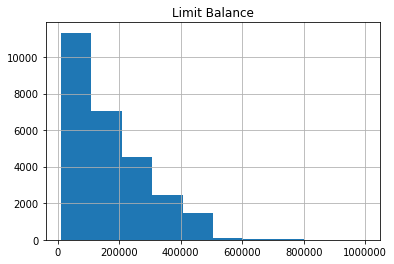

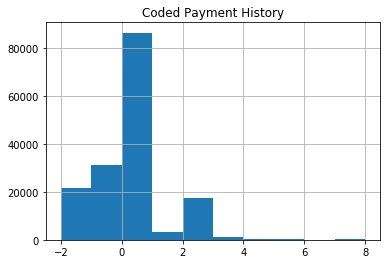

Monthly Bill Statement Amount
count    1.620000e+05
mean     4.488606e+04
std      6.667883e+04
min     -2.090510e+05
25%      2.400000e+03
50%      1.931500e+04
75%      5.715450e+04
max      1.664089e+06
dtype: float64


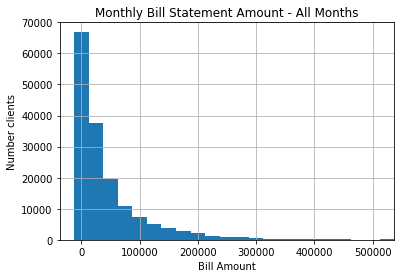

Monthly Amount of Previous Payment
count    1.620000e+05
mean     5.272188e+03
std      1.788870e+04
min      0.000000e+00
25%      3.900000e+02
50%      1.900000e+03
75%      4.524000e+03
max      1.684259e+06
dtype: float64


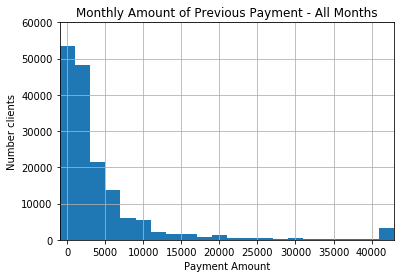

In [8]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import seaborn

dftv.X1.hist()
plt.title("Limit Balance")
plt.show()

X6_11 = dftv.X6.append([dftv.X7, dftv.X8, dftv.X9, dftv.X10, dftv.X11])
X6_11.hist()
plt.title("Coded Payment History")
plt.show()

# Histograms de variables mensuales.
X12_17 = dftv.X12.append([dftv.X13, dftv.X14, dftv.X15, dftv.X16, dftv.X17])
print("Monthly Bill Statement Amount")
print(X12_17.describe())
plt.axis([-37500, 537500, 0, 70000])
binBoundaries = np.linspace(-37500, 537500, 24)
binBoundaries[-1] = 2000000
X12_17.hist(bins=binBoundaries)
plt.title("Monthly Bill Statement Amount - All Months")
plt.xlabel("Bill Amount")
plt.ylabel("Number clients")
plt.show()


X18_23 = dftv.X18.append([dftv.X19, dftv.X20, dftv.X21, dftv.X22, dftv.X23])
print("Monthly Amount of Previous Payment")
print(X18_23.describe())
plt.axis([-1000, 43000, 0, 60000])
binBoundaries = np.linspace(-1000, 43000, 23)
binBoundaries[-1] = 2000000
X18_23.hist(bins=binBoundaries)
plt.title("Monthly Amount of Previous Payment - All Months")
plt.xlabel("Payment Amount")
plt.ylabel("Number clients")
plt.show()

In [ ]:
# Compensar por oblicuidad de la distribucion del dinero.
# Función para aplicar a cualquier X (entran, val, test, entran_os)
cols_monto = ['X12', 'X13', 'X14', 'X15', 'X16', 'X17', 
               'X18', 'X19', 'X20', 'X21', 'X22', 'X23']
def sqrt_monto(X):
    for x in cols_monto:
        #print(x)
        X.loc[X[x]>0, x] = np.sqrt(X.loc[X[x]>0, x])
        X.loc[X[x]<0, x] = -np.sqrt(np.absolute((X.loc[X[x]<0,x])))

X_entren_os_tr = X_entren_os.copy()
#print(X_entren_os_tr.describe())
sqrt_monto(X_entren_os_tr)
#print(X_entren_os_tr.describe())
X_val_tr = X_val.copy()
sqrt_monto(X_val_tr)

# Preparar X_test_tr tambien.
X_test_tr = X_test.copy()
sqrt_monto(X_test_tr)

## Función de costo adaptado  

In [9]:
# Función de costo y exatitud.
import collections
from sklearn import metrics


def custom_cost(modelo, X, y, printout=True):
    predicciones = modelo.predict(X)
    return _custom_cost(y, predicciones, printout)
    
def _custom_cost(y, predicciones, printout=True):

    accuracy = metrics.accuracy_score(y, predicciones)
    precision = metrics.precision_score(y, predicciones)
    recall = metrics.recall_score(y, predicciones)

    matriz_confusion = metrics.confusion_matrix(y, predicciones)
    # Mapping from http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html
    # 0 is the negative category.
    # rows are the actual values.
    # columns are the predicted values.
    # So it is just the opposite orientation of +/-.
    TN = matriz_confusion[0,0]
    FN = matriz_confusion[1,0]
    FP = matriz_confusion[0,1]
    TP = matriz_confusion[1,1]
    # From this we can calculate the other measures.
    # If cost for each state, we can calculate overall cost.
    # Coefficients de costo.
    cTP = -1; cFN = 5; cFP = 1; cTN = 0
    todo_costo = cFN*FN + cFP*FP + cTN*TN + cTP*TP
    cost = todo_costo/len(y)
    
    if printout:
        print('Exactitud:    ',  accuracy)
        print('Precisión:    ', precision)
        print('Exhaustividad:', recall)
        print('Costo por cliente:', cost)
            
    quality = collections.namedtuple('Quality', 'accuracy, precision, recall, cost')
    return quality(accuracy, precision, recall, cost)


## Mostrar probabilidades - empirical (por metodo de Yeh) vs prediccion  

In [10]:
# define the function to estimate empirical probabilities.
# returns predicted probability (trimmed by n on both sides)
# and empirical probability calculated by Yeh's SMM method.
import numpy as np
def getPQprobs(y, y_prob, n=50):
    frame = { 'y': y, 'y_prob': y_prob } 
    df = pd.DataFrame(frame)
    df = df.sort_values(['y_prob'])
    y = df.y
    y_prob = df.y_prob
    prob_smm = []
    denom = 2*n + 1
    for i in range(n, len(y)-n):
        p = y[i-n:i+n+1].sum()/denom
        prob_smm.append(p)
    prob_pred = np.array(y_prob[n:len(y)-n])
    prob_smm = np.array(prob_smm)
    return (prob_pred, prob_smm)

# plot actual versus predicted probabilities sorted ascending on predicted.
import matplotlib.pyplot as plt
%matplotlib inline
def plotPQ(prob_emp, prob_pred):
    plt.rcParams.update({'font.size': 9})
    plt.plot(prob_pred, prob_emp, label= ("Empirical x Prediccion") )
    plt.xlabel("Prob Predicción")
    plt.ylabel("Prob Empirical")
    from scipy.stats import entropy
    kld = entropy(pk=prob_emp, qk=prob_pred)
    from scipy.spatial import distance
    jsd = distance.jensenshannon(prob_emp, prob_pred)
    plt.title(("Curva Probabilidades (KL div = %.4f, JS div = %.4f)" % (kld, jsd)))

# Combine the procedures
def mostrarPQ(y, y_prob):
    prob_pred, prob_smm = getPQprobs(y, y_prob)
    plotPQ(prob_smm, prob_pred)



# Random Forest

## Busqueda del Optimo en RandomForest

In [13]:
# Función para buscar el mejor costo de validacion.
import sys
from sklearn.ensemble import RandomForestClassifier

def imprimirCalidad(calidad):
    print('Exactitud:    ',  calidad.accuracy)
    print('Precisión:    ', calidad.precision)
    print('Exhaustividad:', calidad.recall)
    print('Costo por cliente:', calidad.cost)


def buscarForest(X_entren, y_entren, X_val, y_val,
                 n_est_list=[20], min_imp_dec_list=[0], max_depth_list=[None], printdetail=False):
    
    _cost = sys.float_info.max
    
    for n_est in n_est_list:
        for min_imp in min_imp_dec_list:
            for max_depth in max_depth_list:
                bosque = RandomForestClassifier(
                    n_estimators=n_est, min_impurity_decrease=min_imp, max_depth=max_depth)
                bosque.fit(X_entren, y_entren)

                if printdetail:
                    print('\n* Parametros *')
                    print('num_estimators =', n_est)
                    print('min_impurity_decrease =', min_imp)
                    print('max_depth =', max_depth)
                    print('\nEntrenamiento')
                    entren_cost = custom_cost(bosque, X_entren, y_entren, True)
                    print('\nValidacion')
                    val_cost = custom_cost(bosque, X_val, y_val, True)
                else:
                    entren_cost = custom_cost(bosque, X_entren, y_entren, False)
                    val_cost = custom_cost(bosque, X_val, y_val, False)
                    
                if _cost > val_cost.cost:
                    _cost = val_cost.cost
                    _n_est = n_est
                    _min_imp = min_imp
                    _max_depth = max_depth
                    _entren_cost = entren_cost
                    _val_cost = val_cost
                    _bosque = bosque
               
    print('\n*** Summilla - Mejor Resultados ***')
    print('\nParametros:')
    print('num_estimators =', _n_est)
    print('min_impurity_decrease =', _min_imp)
    print('max_depth =', _max_depth)
    print('\nEntrenamiento')
    imprimirCalidad(_entren_cost)
    print('\nValidacion')
    imprimirCalidad(_val_cost)

    print('\nProbabilidad de no pagar')
    y_val_prob = _bosque.predict_proba(X_val)[:,1] # Using probability of category +1
    mostrarPQ(y_val, y_val_prob)



*** Summilla - Mejor Resultados ***

Parametros:
num_estimators = 100
min_impurity_decrease = 0
max_depth = 15

Entrenamiento
Exactitud:     0.9122083333333333
Precisión:     0.9902824172487094
Exhaustividad: 0.6111319340329835
Costo por cliente: 0.29775

Validacion
Exactitud:     0.827
Precisión:     0.7122905027932961
Exhaustividad: 0.38002980625931443
Costo por cliente: 0.6426666666666667

Probabilidad de no pagar


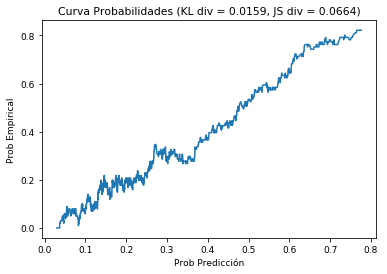

In [14]:
buscarForest(X_entren, y_entren, X_val, y_val, 
             n_est_list=[10, 50, 100], 
             min_imp_dec_list=[0, 0.00003333, 0.0001, 0.0003333], 
             max_depth_list=[7, 11, 15], printdetail=False)

# Neural Network using Keras

In [16]:
from sklearn.preprocessing import StandardScaler
from keras.utils import to_categorical

scaler = StandardScaler()
scaler.fit(X_entren)
_X_entren = scaler.transform(X_entren)
_X_val = scaler.transform(X_val)

default = y_entren.sum()
ratio = float(default/len(y_entren))
print('Default Ratio :',ratio)



Using TensorFlow backend.


Default Ratio : 0.22233333333333333


/home/alain/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/alain/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  
/home/alain/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  import sys


In [17]:
# Deep Learning Libraries
from keras.layers import Dense
from keras.models import Sequential

n_cols = _X_entren.shape[1]

model = Sequential()
model.add(Dense(32, activation='relu', input_shape = (n_cols,)))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',loss='binary_crossentropy', metrics=['acc'])
model.fit(_X_entren, y_entren, epochs=40, validation_data=(_X_val, y_val))



Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Train on 24000 samples, validate on 3000 samples
Epoch 1/40
24000/24000 [==============================] - 1s 37us/step - loss: 0.4894 - acc: 0.7941 - val_loss: 0.4451 - val_acc: 0.8203
Epoch 2/40
24000/24000 [==============================] - 1s 27us/step - loss: 0.4498 - acc: 0.8133 - val_loss: 0.4326 - val_acc: 0.8183
Epoch 3/40
24000/24000 [==============================] - 1s 31us/step - loss: 0.4396 - acc: 0.8168 - val_loss: 0.4281 - val_acc: 0.8210
Epoch 4/40
24000/24000 [==============================] - 1s 29us/step - loss: 0.4354 - acc: 0.8176 - val_loss: 0.4241 - val_acc: 0.8223
Epoch 5/40
24000/24000 [==============================] - 1s 29us/step - loss: 0.4307 - acc: 0.8182 - val_loss: 0.4237 - val_acc: 0.8240
Epoch 6/40
24000/24000 [==============================] - 1s 29us/step - loss: 0.4277 - acc: 0.8196 - val_loss: 0.4222 - val_acc: 0.8240
Epoch 7/4

** Validación **
Exactitud:     0.8166666666666667
Precisión:     0.6587926509186351
Exhaustividad: 0.3740685543964232
Costo por cliente: 0.6596666666666666
(3000,) (3000,)


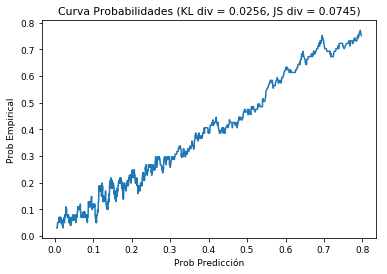

In [18]:
# Check cost measure.
# Predict makes 2-D array of (n,1), squeeze it back to vector (n,).
print('** Validación **')
y_val_prob = np.squeeze(model.predict(_X_val))
y_pred = (y_val_prob > 0.5)
_custom_cost(y_val, y_pred)

#Plot probabilities.
print(y_val.shape, y_val_prob.shape)
mostrarPQ(y_val, y_val_prob)

# SVM

In [ ]:
from sklearn.svm import SVC

svcModel = SVC(kernel='rbf', C=1)
svcModel.fit(X_entren, y_entren)

In [ ]:
print('\nEntrenamiento')
custom_cost(svcModel, X_entren, y_entren)